In [1]:
import src.lfw_dataset as lfw
from src.lfw_dataset import LFWDataLoader
from src.siamese import Siamese

Using TensorFlow backend.


In [2]:
# load the paths of the data sets
same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, same_test_paths, diff_test_paths = lfw.load_data()

Data already exist


In [3]:
# initialize the network 
s_net = Siamese()
s_net.build('paper_network')

In [4]:
s_net.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 1024)         152190784   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1024)         0           sequential_1[1][0]               
          

In [5]:
history = s_net.train(same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, epochs=400, epoch_shuffle=True)

Epoch 1/400
55/55 [==============================] - 33s 605ms/step - loss: 605.8751 - acc: 0.5000 - val_loss: 605.8535 - val_acc: 0.5000
Epoch 2/400
55/55 [==============================] - 19s 341ms/step - loss: 605.8397 - acc: 0.5028 - val_loss: 605.8244 - val_acc: 0.5024
Epoch 3/400
55/55 [==============================] - 19s 341ms/step - loss: 605.8165 - acc: 0.5205 - val_loss: 605.8051 - val_acc: 0.5505
Epoch 4/400
55/55 [==============================] - 19s 341ms/step - loss: 605.7988 - acc: 0.5687 - val_loss: 605.7912 - val_acc: 0.5697
Epoch 5/400
55/55 [==============================] - 19s 341ms/step - loss: 605.7860 - acc: 0.6080 - val_loss: 605.7789 - val_acc: 0.6274
Epoch 6/400
55/55 [==============================] - 19s 341ms/step - loss: 605.7759 - acc: 0.6193 - val_loss: 605.7705 - val_acc: 0.6202
Epoch 7/400
55/55 [==============================] - 19s 339ms/step - loss: 605.7678 - acc: 0.6102 - val_loss: 605.7618 - val_acc: 0.6346
Epoch 8/400
55/55 [===============

In [6]:
test_loss,test_accuracy = s_net.test(same_test_paths,diff_test_paths)

31/31 [==============================] - 4s 137ms/step


In [8]:
def evaluate(test_loss, test_accuracy, train_history):

    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    # plot accuracy 
    axes[0].plot(train_history.history['acc'])
    axes[0].plot(train_history.history['val_acc'])
    axes[0].set_title('model accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='best')

    # plot loss
    axes[1].plot(train_history.history['loss'])
    axes[1].plot(train_history.history['val_loss'])
    axes[1].set_title('model loss')
    axes[1].set_ylabel('accuracy')
    axes[1].set_xlabel('epoch')
    axes[1].legend(['training', 'validation'], loc='best')


    print()
    print(f'Test loss: {test_loss:.3}')
    print(f'Test accuracy: {test_accuracy:.3}')


Test loss: 6.06e+02
Test accuracy: 0.614


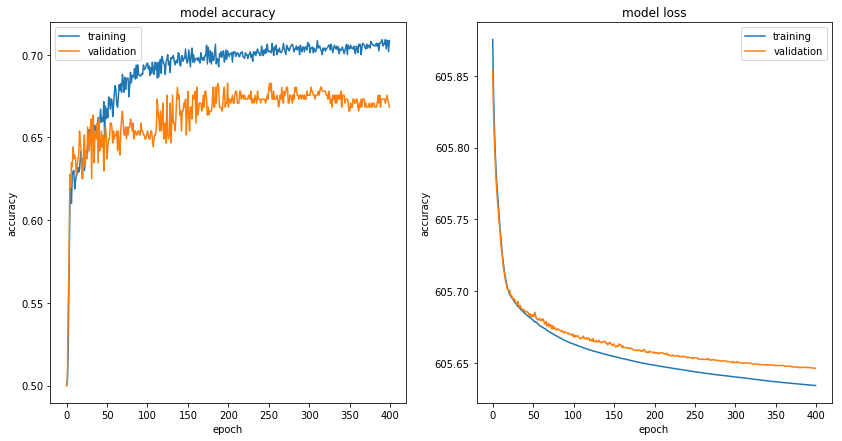

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

evaluate(test_loss, test_accuracy, history)
